<a href="https://colab.research.google.com/github/RawanZagh/Colab-Test/blob/main/Building_a_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip
!unzip Sample-Pictures.zip
!mv "Sample Pictures" train

--2023-08-24 13:36:14--  https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip
Resolving sourceforge.net (sourceforge.net)... 104.18.11.128, 104.18.10.128, 2606:4700::6812:a80, ...
Connecting to sourceforge.net (sourceforge.net)|104.18.11.128|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip/ [following]
--2023-08-24 13:36:14--  https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip/download [following]
--2023-08-24 13:36:14--  https://sourceforge.net/projects/fotohound/files/sample-pictures/Sample/Sample-Pictures.zip/download
Reusing existing connection to sourceforge

In [ ]:
import torch
import torchvision
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import random; random.seed(1)
import os
import shutil


In [ ]:
labels = ['Flowers', 'Scenery', 'Zoo']

train_directory = './train'
val_directory = './val'

try:
    os.mkdir(val_directory)
except FileExistsError:
    pass

for label in labels:
   # os.mkdir(os.path.join(val_directory, label))

    images = os.listdir(os.path.join(train_directory, label))
    val_images = random.sample(images, len(images) // 5)

    for image in val_images:
        shutil.move(
            os.path.join(train_directory, label, image),
            os.path.join(val_directory, label, image)
        )


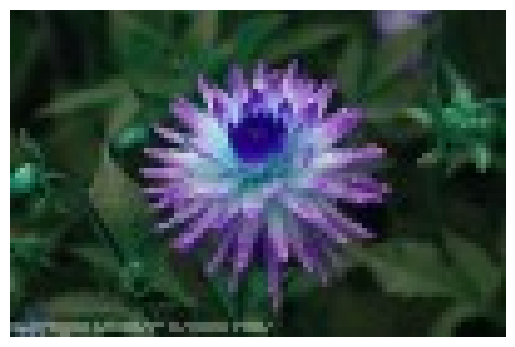

In [ ]:
sample_train_img = cv2.imread('train/Flowers/DSC_0021_th.jpg')
plt.imshow(sample_train_img)
plt.axis('off')
plt.show()

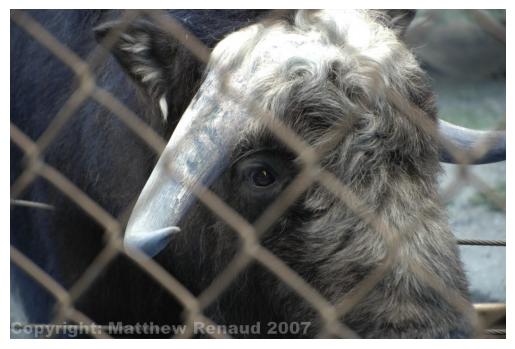

In [ ]:
sample_val_img = cv2.imread('val/Zoo/DSC_4351.jpg')
plt.imshow(sample_val_img)
plt.axis('off')
plt.show()

In [ ]:
# @title
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.dataset = torchvision.datasets.ImageFolder(
            self.directory,
            transform=transform,
            loader=self.__load_image
        )
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __load_image(self, path):
        img = cv2.imread(path, 0)
        img = cv2.resize(img, (500, 500))
        img = Image.fromarray(img, mode='L')
        return img

    def __getitem__(self, idx):
        return self.dataset[idx]

In [ ]:
train_dataset = ImageDataset(train_directory)
val_dataset = ImageDataset(val_directory)

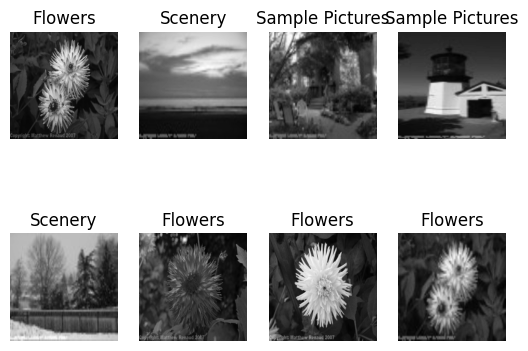

In [ ]:
n_img = 8

for i in range(n_img // 2):
    plt.subplot(2, 4, i + 1)
    img, label = train_dataset[random.randint(0, len(train_dataset) - 1)]
    plt.imshow(img, cmap='gray')
    plt.title(train_dataset.dataset.classes[label])
    plt.axis('off')

for i in range(n_img // 2):
    plt.subplot(2, 4, n_img // 2 + i + 1)
    img, label = val_dataset[random.randint(0, len(val_dataset) - 1)]
    plt.imshow(img, cmap='gray')
    plt.title(val_dataset.dataset.classes[label])
    plt.axis('off')

plt.show()